# Table of Contents

### Chapter 1 Case Overview
    ● 1.1 Problem Statement
    ● 1.2 Assumptions
### Chapter 2 Package Loading
    ● 2.1 Install and Update Packages
    ● 2.2 Import Packages
### Chapter 3 Loading Datasets
    ● 3.1 Dataframe Shape Check Function
    ● 3.2 Loading Zillow Dataset
        ● 3.2.1 Find New York
        ● 3.2.2 Add New Column
        ● 3.2.3 Drop Unnecessary Columns
        ● 3.2.4 Rename Column
    ● 3.3 Loading Airbnb Dataset
        ● 3.3.1 Filter Airbnb Dataset
        ● 3.3.2 Check Datatype
### Chapter 4 Merging Datasets
    ● 4.1 Merge Two Datesets
        ● 4.1.2 Creating New Column
### Chapter 5 Quality Check
    ● 5.1 Missing Value Check
    ● 5.2 Duplication Check
    ● 5.3 Datatype Check
    ● 5.4 Define Outliers
        display the boxplot of outlier and fill the NA values as median data or throw it out from model. 
### Chapter 6 Data Cleaning
    ● 6.1 Change Datatype
    ● 6.2 Missing Values
        ● 6.2.1 Predict Weekly and Monthly Price
        ● 6.2.2 Drop Unnecessary Columns
    ● 6.3 Remove Outliers
### Chapter 7 Data Analysis
    ● 7.1 Number of Zipcodes in Each Region
    ● 7.2 Number of Properties in Each Zipcode
    ● 7.3 Number of Reviews vs Airbnb Daily Price
    ● 7.4 SizeRank vs Airbnb Daily Price
    ● 7.5 Zillow House Prices in Each Zipcode
    ● 7.6 Median Airbnb Daily Prices in Each Zipcode
    ● 7.7 Median Airbnb Daily Prices vs Zillow Prices in Each Zipcode
    ● 7.8 Map Visualization
    ● 7.9 Revenue
        ● 7.9.1 Calcuating Yearly Revenue
        ● 7.9.2 Median Airbnb Yearly Revenue in Each Zipcode
        ● 7.9.3 Break Even
        ● 7.9.4 20 Years Investment Summery
        ● 7.9.5 Years To Break Even vs Yearly Gains
### Chapter 8 Conclusion

In [1]:
#Import AirBnB data and Zillow data   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

airbnb = pd.read_csv("E:/onedrive/projects/capital_one/listings.csv")
zillow = pd.read_csv("E:/onedrive/projects/capital_one/Zip_Zhvi_2bedroom.csv")
nyc_zip_list = pd.read_csv("E:/onedrive/projects/capital_one/nyc_zip.csv")
nyc_zip_list = nyc_zip_list.sort_values(by=['zipcode'])
print(nyc_zip_list.shape)
nyc_zip_list = nyc_zip_list.drop_duplicates(subset=['zipcode'],keep='last')
print(nyc_zip_list.shape)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (43,61,62,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
(480, 2)
(240, 2)


In [2]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
2,3647,https://www.airbnb.com/rooms/3647,20190708031610,2019-07-08,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
3,3831,https://www.airbnb.com/rooms/3831,20190708031610,2019-07-09,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,...,f,f,moderate,f,f,1,1,0,0,4.64
4,5022,https://www.airbnb.com/rooms/5022,20190708031610,2019-07-08,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,Loft apartment with high ceiling and wood floo...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,0.10


Chapter 3 Loading Datasets

In [3]:
zillow_ny = zillow[zillow.City == 'New York'][zillow.State == 'NY']
display(zillow_ny.head())

ipykernel_launcher:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
13,61703,10128,New York,NY,New York,New York,14,NaN,NaN,NaN,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
14,61625,10011,New York,NY,New York,New York,15,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
20,61617,10003,New York,NY,New York,New York,21,NaN,NaN,NaN,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000


In [4]:
zillow_ny['annual_median'] = zillow_ny[['2016-07','2016-08','2016-09','2016-10','2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06']].median(axis=1)
zillow_ny['annual_slope']  = (zillow_ny[['2017-04','2017-05','2017-06']].median(axis=1) - zillow_ny[['2016-07','2016-08','2016-09']].median(axis=1))/zillow_ny[['2016-07','2016-08','2016-09']].median(axis=1)
zillow_ny['estimated_price'] =  zillow_ny['annual_median'] + 0.5*zillow_ny['annual_median']*zillow_ny['annual_slope'] 
zillow_ny['estimated_price'] = round(zillow_ny['estimated_price'],2)


In [5]:
display(zillow_ny.head())

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,annual_median,annual_slope,estimated_price
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000,1365200.0,0.011350,1372947.79
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300,1964100.0,0.064911,2027846.14
13,61703,10128,New York,NY,New York,New York,14,NaN,NaN,NaN,...,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100,1552600.0,0.114386,1641397.58
14,61625,10011,New York,NY,New York,New York,15,NaN,NaN,NaN,...,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400,2347150.0,0.038899,2392801.06
20,61617,10003,New York,NY,New York,New York,21,NaN,NaN,NaN,...,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000,1942550.0,0.082923,2023090.62


In [6]:
zillow_ny_cleaned = zillow_ny[['RegionID','RegionName','estimated_price','City','CountyName']]
zillow_ny_cleaned.rename(columns={'RegionName' : 'zipcode'}, inplace=True)
zillow_ny_cleaned.rename(columns={'City' : 'City_Standardrized'}, inplace=True)
display(zillow_ny_cleaned.head())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,RegionID,zipcode,estimated_price,City_Standardrized,CountyName
0,61639,10025,1372947.79,New York,New York
2,61637,10023,2027846.14,New York,New York
13,61703,10128,1641397.58,New York,New York
14,61625,10011,2392801.06,New York,New York
20,61617,10003,2023090.62,New York,New York


In [7]:
for coloumn in airbnb.columns: 
    print(coloumn)
airbnb['smart_location']

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

0        Brooklyn , NY
1         New York, NY
2         New York, NY
3         Brooklyn, NY
4         New York, NY
             ...      
48890     Brooklyn, NY
48891    Brooklyn , NY
48892     New York, NY
48893     New York, NY
48894     New York, NY
Name: smart_location, Length: 48895, dtype: object

In [8]:
airbnb_columns = ['id','city','state','zipcode','bedrooms','last_scraped','square_feet','price','weekly_price','monthly_price','cleaning_fee','number_of_reviews','review_scores_rating','availability_365','availability_90','availability_60','availability_30']
airbnb_filtered = airbnb[airbnb['bedrooms']==2].loc[:,airbnb_columns]

In [9]:
airbnb_filtered.head()

,id,city,state,zipcode,bedrooms,last_scraped,square_feet,price,weekly_price,monthly_price,cleaning_fee,number_of_reviews,review_scores_rating,availability_365,availability_90,availability_60,availability_30
19,7750,New York,NY,10029,2.0,2019-07-08,750.0,$190.00,NaN,NaN,NaN,0,NaN,249,14,14,4
48,13050,Brooklyn,NY,11221,2.0,2019-07-09,1400.0,$115.00,$850.00,NaN,$85.00,11,94.0,0,0,0,0
52,14290,Brooklyn,NY,11206,2.0,2019-07-08,NaN,$228.00,NaN,NaN,$128.00,82,94.0,140,50,20,14
61,15396,New York,NY,10001,2.0,2019-07-08,NaN,$375.00,"$2,750.00","$7,500.00",$120.00,5,100.0,180,90,60,30
62,15711,New York,NY,10162,2.0,2019-07-08,NaN,$250.00,"$2,000.00","$6,000.00",$200.00,66,93.0,231,28,12,0


In [10]:
airbnb_filtered.dropna(subset=['zipcode'],inplace=True)
airbnb_filtered['zipcode'] = airbnb_filtered['zipcode'].apply(lambda x: str(x).split("-")[0])
airbnb_filtered['zipcode'] = pd.to_numeric(airbnb_filtered['zipcode'], downcast='integer')

In [11]:
final_data = airbnb_filtered.merge(zillow_ny_cleaned,how="inner",on='zipcode')
print(final_data.shape)
final_data = final_data.merge(nyc_zip_list,how="inner",on='zipcode')
print(final_data.shape)

(1565, 21)
(1565, 22)


In [12]:
display(final_data.head())

,id,city,state,zipcode,bedrooms,last_scraped,square_feet,price,weekly_price,monthly_price,...,review_scores_rating,availability_365,availability_90,availability_60,availability_30,RegionID,estimated_price,City_Standardrized,CountyName,Area
0,16458,Brooklyn,NY,11215,2.0,2019-07-08,NaN,$225.00,NaN,NaN,...,100.0,0,0,0,0,62026,1076015.49,New York,Kings,Brooklyn
1,27659,Brooklyn,NY,11215,2.0,2019-07-08,NaN,$400.00,"$2,700.00",NaN,...,95.0,216,17,17,0,62026,1076015.49,New York,Kings,Brooklyn
2,41348,Brooklyn,NY,11215,2.0,2019-07-09,1200.0,$250.00,NaN,NaN,...,94.0,0,0,0,0,62026,1076015.49,New York,Kings,Brooklyn
3,58062,Brooklyn,NY,11215,2.0,2019-07-09,350.0,$135.00,$810.00,NaN,...,97.0,272,6,0,0,62026,1076015.49,New York,Kings,Brooklyn
4,76761,Brooklyn,NY,11215,2.0,2019-07-09,NaN,$169.00,NaN,NaN,...,97.0,182,38,21,9,62026,1076015.49,New York,Kings,Brooklyn


In [13]:
import locale
numeric_col_list = ['price','weekly_price','monthly_price','cleaning_fee']
for column in numeric_col_list:
    if final_data[column].dtype == object:
        final_data[column].fillna('', inplace=True)
        final_data[column] = pd.to_numeric(final_data[column].replace('[\$,]', '', regex=True))

display(final_data.head())
display(final_data.info())

,id,city,state,zipcode,bedrooms,last_scraped,square_feet,price,weekly_price,monthly_price,...,review_scores_rating,availability_365,availability_90,availability_60,availability_30,RegionID,estimated_price,City_Standardrized,CountyName,Area
0,16458,Brooklyn,NY,11215,2.0,2019-07-08,NaN,225.0,NaN,NaN,...,100.0,0,0,0,0,62026,1076015.49,New York,Kings,Brooklyn
1,27659,Brooklyn,NY,11215,2.0,2019-07-08,NaN,400.0,2700.0,NaN,...,95.0,216,17,17,0,62026,1076015.49,New York,Kings,Brooklyn
2,41348,Brooklyn,NY,11215,2.0,2019-07-09,1200.0,250.0,NaN,NaN,...,94.0,0,0,0,0,62026,1076015.49,New York,Kings,Brooklyn
3,58062,Brooklyn,NY,11215,2.0,2019-07-09,350.0,135.0,810.0,NaN,...,97.0,272,6,0,0,62026,1076015.49,New York,Kings,Brooklyn
4,76761,Brooklyn,NY,11215,2.0,2019-07-09,NaN,169.0,NaN,NaN,...,97.0,182,38,21,9,62026,1076015.49,New York,Kings,Brooklyn


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565 entries, 0 to 1564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1565 non-null   int64  
 1   city                  1562 non-null   object 
 2   state                 1564 non-null   object 
 3   zipcode               1565 non-null   int16  
 4   bedrooms              1565 non-null   float64
 5   last_scraped          1565 non-null   object 
 6   square_feet           27 non-null     float64
 7   price                 1565 non-null   float64
 8   weekly_price          214 non-null    float64
 9   monthly_price         167 non-null    float64
 10  cleaning_fee          1353 non-null   float64
 11  number_of_reviews     1565 non-null   int64  
 12  review_scores_rating  1178 non-null   float64
 13  availability_365      1565 non-null   int64  
 14  availability_90       1565 non-null   int64  
 15  availability_60      

None

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='weekly_price', ylabel='price'>,
        <AxesSubplot:xlabel='monthly_price', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='weekly_price'>,
        <AxesSubplot:xlabel='weekly_price', ylabel='weekly_price'>,
        <AxesSubplot:xlabel='monthly_price', ylabel='weekly_price'>],
       [<AxesSubplot:xlabel='price', ylabel='monthly_price'>,
        <AxesSubplot:xlabel='weekly_price', ylabel='monthly_price'>,
        <AxesSubplot:xlabel='monthly_price', ylabel='monthly_price'>]],
      dtype=object)

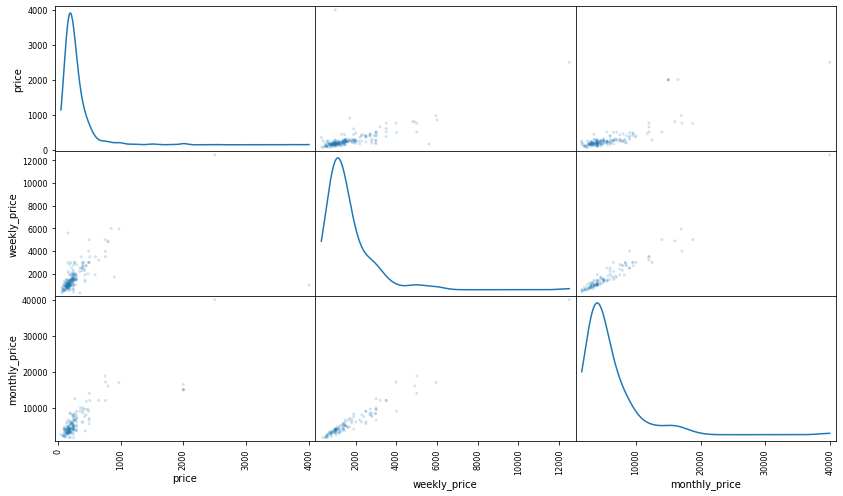

In [14]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import gridspec
scatter_matrix(final_data[['price','weekly_price','monthly_price']],figsize = (14,8), alpha = 0.2,grid=True, diagonal = 'kde')

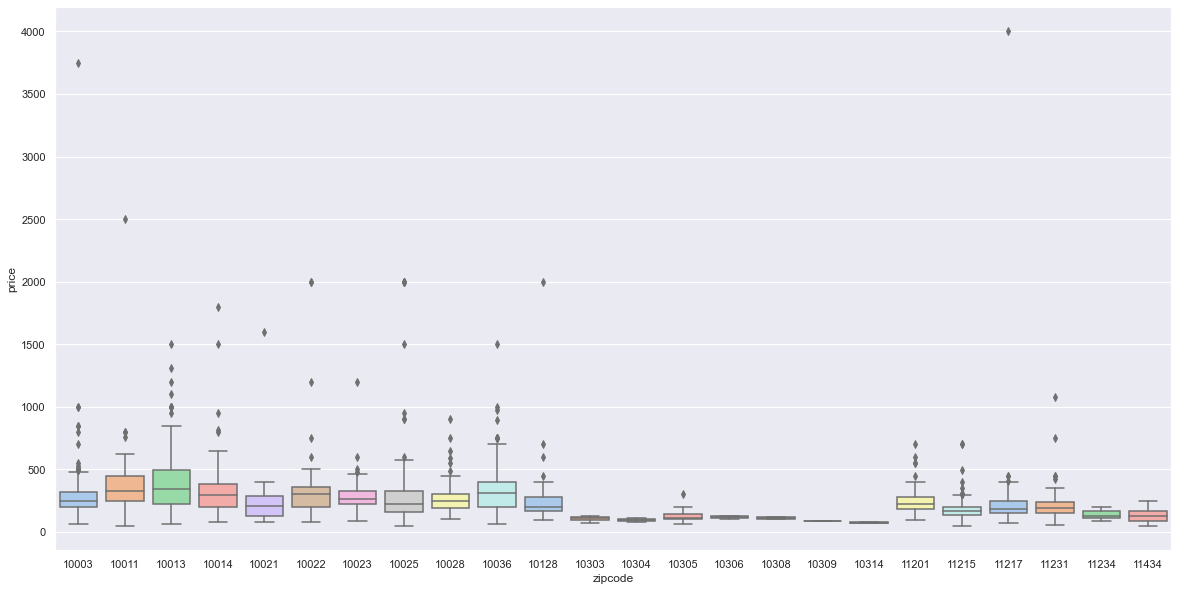

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
outlier = sns.boxplot(x='zipcode',y='price',data=final_data[['price','zipcode']], palette = 'pastel')

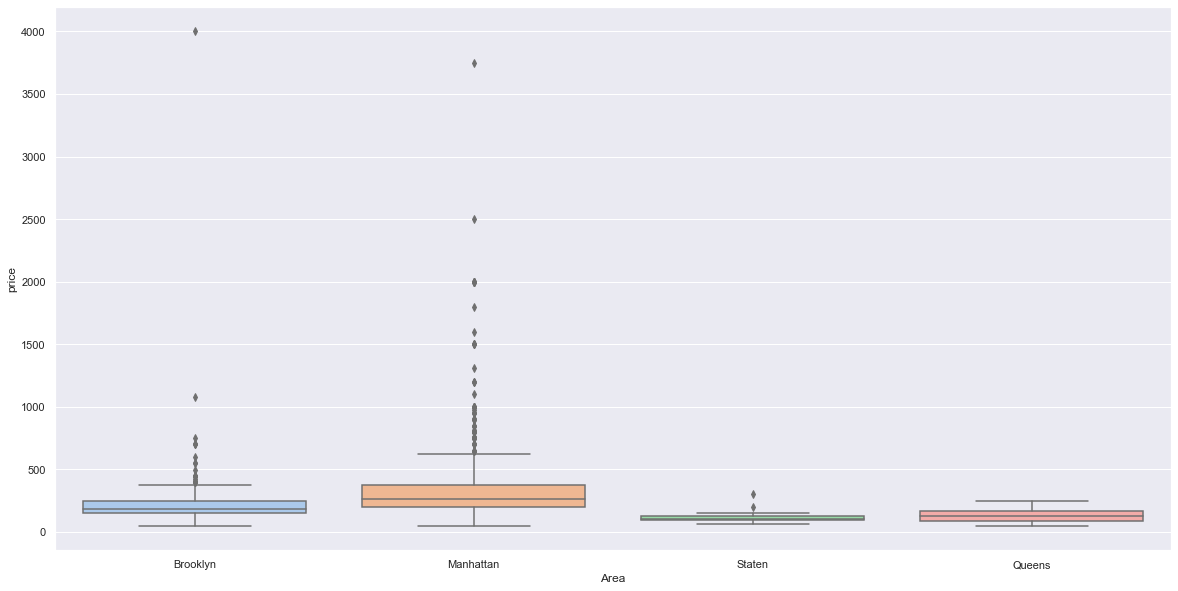

In [16]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
outlier = sns.boxplot(x='Area',y='price',data=final_data[['price','Area']], palette = 'pastel')

In [17]:
for column in final_data.columns:
    print(column,"Total records:",final_data[column].count() ,"missing ",final_data[column].isnull().sum(),"records" )

id Total records: 1565 missing  0 records
city Total records: 1562 missing  3 records
state Total records: 1564 missing  1 records
zipcode Total records: 1565 missing  0 records
bedrooms Total records: 1565 missing  0 records
last_scraped Total records: 1565 missing  0 records
square_feet Total records: 27 missing  1538 records
price Total records: 1565 missing  0 records
weekly_price Total records: 214 missing  1351 records
monthly_price Total records: 167 missing  1398 records
cleaning_fee Total records: 1353 missing  212 records
number_of_reviews Total records: 1565 missing  0 records
review_scores_rating Total records: 1178 missing  387 records
availability_365 Total records: 1565 missing  0 records
availability_90 Total records: 1565 missing  0 records
availability_60 Total records: 1565 missing  0 records
availability_30 Total records: 1565 missing  0 records
RegionID Total records: 1565 missing  0 records
estimated_price Total records: 1565 missing  0 records
City_Standardrized 

In [18]:

# For each feature find the data points with extreme high or low values
def clean_outlier(df, column):
    outliers = []
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df[column], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df[column], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1)*3
    
    # Display the outliers
    # print ("Data points considered outliers for the feature '{}':".format(column))
    df[~((df[column] >= Q1 - step) & (df[column] <= Q3 + step))].shape[0]
    for i in list(df[~((df[column] >= Q1 - step) & (df[column] <= Q3 + step))].index):
        if i not in outliers:
            outliers.append(i)
        else:
            if i not in dupes:
                dupes.append(i)
    return outliers
# OPTIONAL: Select the indices for data points you wish to remove


In [32]:
# Remove the outliers, if any were specified
data_filtered = final_data

for Area in final_data.Area.unique():
    outliers  = clean_outlier(final_data[final_data.Area==Area], 'price')
    print("For Area: ", Area , "Identify Outlier Index:")
    print(outliers)
    data_filtered = data_filtered.drop(final_data['price'].index[outliers])

# data_filtered = data_filtered.reset_index(drop = True)
# outliers = clean_outlier(final_data, 'price')
# print(outliers)
print(data_filtered.shape)
from sklearn.linear_model import LinearRegression


#get list of non-nan values for weekly price and its corresponding daily price
price1,weekly_price1 = data_filtered[data_filtered['weekly_price'].isnull()==False][['price','weekly_price']].values.T.tolist()
#get list of non-nan values for monthly price and its corresponding daily price
price2,monthly_price2 = data_filtered[data_filtered['monthly_price'].isnull()==False][['price','monthly_price']].values.T.tolist()

##preditc price use daily price
lm1 = LinearRegression()
lm1.fit(np.array(price1).reshape(-1,1), np.array(weekly_price1).reshape(-1,1))
    
lm2 = LinearRegression()
lm2.fit(np.array(price2).reshape(-1,1), np.array(monthly_price2).reshape(-1,1))

#predict missing value for weekly price
data_filtered.loc[data_filtered['weekly_price'].isnull(),'weekly_price'] = data_filtered['price'].apply(lambda x: round(lm1.predict([[x]])[0][0]))

#predict missing values for monthly price
data_filtered.loc[data_filtered['monthly_price'].isnull(),'monthly_price'] = data_filtered['price'].apply(lambda x: round(lm2.predict([[x]])[0][0]))


For Area:  Brooklyn Identify Outlier Index:
[87, 95, 199, 389, 397, 518, 555, 565, 568]
For Area:  Manhattan Identify Outlier Index:
[479, 588, 599, 615, 618, 637, 640, 644, 655, 670, 684, 795, 842, 843, 919, 922, 931, 939, 940, 942, 1102, 1116, 1120, 1188, 1221, 1222, 1239, 1268, 1274, 1341, 1416]
For Area:  Staten Identify Outlier Index:
[1527]
For Area:  Queens Identify Outlier Index:
[]
(1524, 22)


In [41]:
outliers = 479
print(final_data.loc[outliers])
try:
    print(data_filtered.loc[outliers])
except:
    print("Outlier removed correctly")


id                         35388899
city                       New York
state                            NY
zipcode                       10023
bedrooms                          2
last_scraped             2019-07-09
square_feet                     NaN
price                          1200
weekly_price                    NaN
monthly_price                   NaN
cleaning_fee                    180
number_of_reviews                 0
review_scores_rating            NaN
availability_365                 51
availability_90                  51
availability_60                  22
availability_30                   1
RegionID                      61637
estimated_price         2.02785e+06
City_Standardrized         New York
CountyName                 New York
Area                      Manhattan
Name: 479, dtype: object
Outlier removed correctly


In [21]:
data_filtered['zip_char'] = data_filtered['zipcode'].apply(str)

<AxesSubplot:xlabel='zip_char', ylabel='Count'>

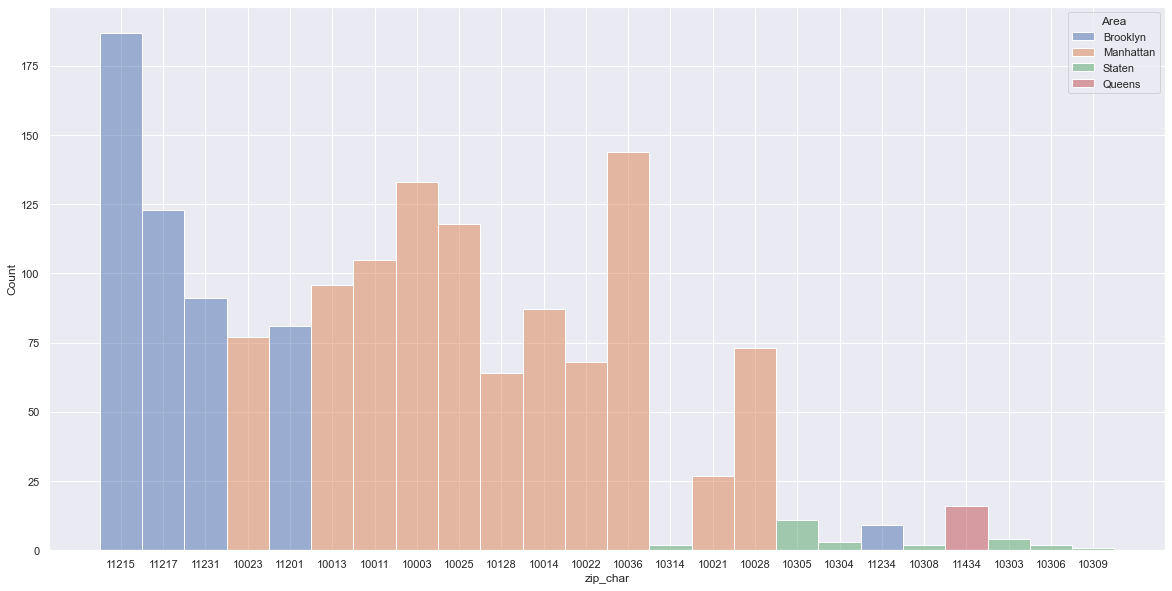

In [22]:
#Number of Airbnb in Each Zipcode
sns.histplot(data=data_filtered, x="zip_char", hue="Area")

In [23]:
#Occupancy Rate

#Calculate occupancy rate
def cal_occupancy_rate(df,period_days):
    #Calculate occupancy rate: current availability number subtracts availability number of last period and divide by availability number of last period
    df["or_"+str(period_days)] = round((period_days - df["availability_"+str(period_days)])/period_days, 2)
    
    return df

data_filtered = cal_occupancy_rate(data_filtered,365)
data_filtered = cal_occupancy_rate(data_filtered,90)
data_filtered = cal_occupancy_rate(data_filtered,60)
data_filtered = cal_occupancy_rate(data_filtered,30)

In [24]:
display(data_filtered.head())
data_filtered

,id,city,state,zipcode,bedrooms,last_scraped,square_feet,price,weekly_price,monthly_price,...,RegionID,estimated_price,City_Standardrized,CountyName,Area,zip_char,or_365,or_90,or_60,or_30
0,16458,Brooklyn,NY,11215,2.0,2019-07-08,NaN,225.0,1464.0,4958.0,...,62026,1076015.49,New York,Kings,Brooklyn,11215,1.00,1.00,1.00,1.0
1,27659,Brooklyn,NY,11215,2.0,2019-07-08,NaN,400.0,2700.0,8127.0,...,62026,1076015.49,New York,Kings,Brooklyn,11215,0.41,0.81,0.72,1.0
2,41348,Brooklyn,NY,11215,2.0,2019-07-09,1200.0,250.0,1589.0,5411.0,...,62026,1076015.49,New York,Kings,Brooklyn,11215,1.00,1.00,1.00,1.0
3,58062,Brooklyn,NY,11215,2.0,2019-07-09,350.0,135.0,810.0,3329.0,...,62026,1076015.49,New York,Kings,Brooklyn,11215,0.25,0.93,1.00,1.0
4,76761,Brooklyn,NY,11215,2.0,2019-07-09,NaN,169.0,1183.0,3944.0,...,62026,1076015.49,New York,Kings,Brooklyn,11215,0.50,0.58,0.65,0.7


,id,city,state,zipcode,bedrooms,last_scraped,square_feet,price,weekly_price,monthly_price,...,RegionID,estimated_price,City_Standardrized,CountyName,Area,zip_char,or_365,or_90,or_60,or_30
0,16458,Brooklyn,NY,11215,2.0,2019-07-08,NaN,225.0,1464.0,4958.0,...,62026,1076015.49,New York,Kings,Brooklyn,11215,1.00,1.00,1.00,1.00
1,27659,Brooklyn,NY,11215,2.0,2019-07-08,NaN,400.0,2700.0,8127.0,...,62026,1076015.49,New York,Kings,Brooklyn,11215,0.41,0.81,0.72,1.00
2,41348,Brooklyn,NY,11215,2.0,2019-07-09,1200.0,250.0,1589.0,5411.0,...,62026,1076015.49,New York,Kings,Brooklyn,11215,1.00,1.00,1.00,1.00
3,58062,Brooklyn,NY,11215,2.0,2019-07-09,350.0,135.0,810.0,3329.0,...,62026,1076015.49,New York,Kings,Brooklyn,11215,0.25,0.93,1.00,1.00
4,76761,Brooklyn,NY,11215,2.0,2019-07-09,NaN,169.0,1183.0,3944.0,...,62026,1076015.49,New York,Kings,Brooklyn,11215,0.50,0.58,0.65,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,28407992,Staten Island,NY,10303,2.0,2019-07-08,NaN,71.0,691.0,2170.0,...,61779,319608.52,New York,Richmond,Staten,10303,1.00,1.00,1.00,1.00
1520,31209400,Staten Island,NY,10303,2.0,2019-07-09,NaN,130.0,987.0,3238.0,...,61779,319608.52,New York,Richmond,Staten,10303,0.52,0.07,0.10,0.20
1521,20136828,Staten Island,NY,10306,2.0,2019-07-09,NaN,105.0,862.0,2786.0,...,61782,340403.65,New York,Richmond,Staten,10306,0.02,0.08,0.12,0.00
1522,34368051,Staten Island,NY,10306,2.0,2019-07-09,NaN,130.0,987.0,3238.0,...,61782,340403.65,New York,Richmond,Staten,10306,0.01,0.01,0.02,0.03


<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

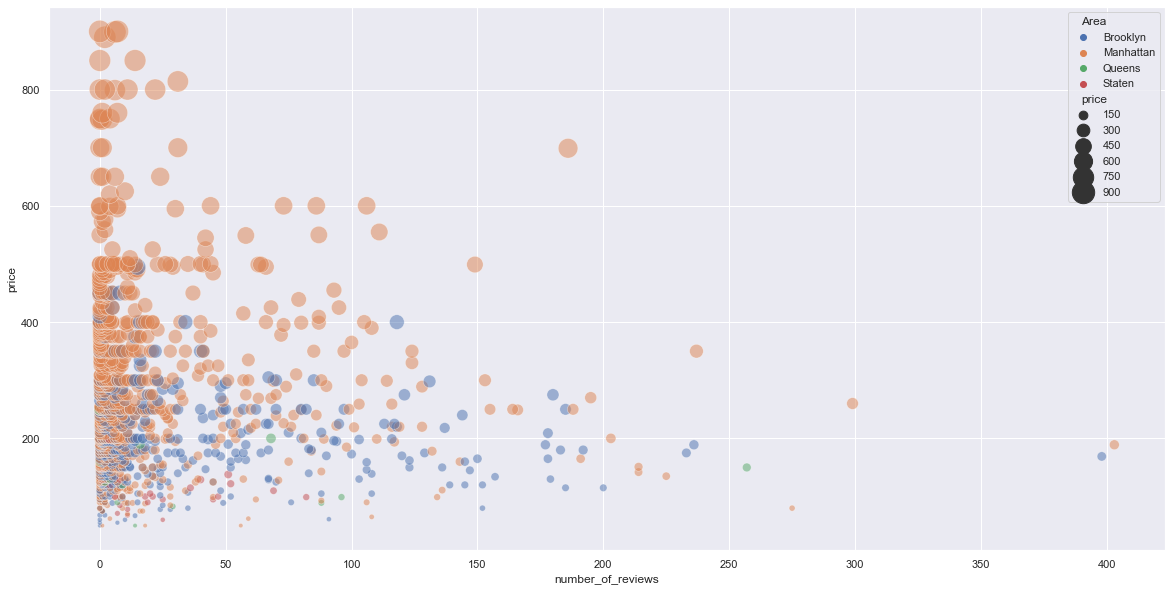

In [25]:
data_filtered_smry = data_filtered.groupby(['price','number_of_reviews','Area']).agg({'id': 'count'}).reset_index()
# display(data_filtered_smry)

sns.scatterplot(x="number_of_reviews", 
                y="price",
                size="price",
                sizes=(20,500),
                alpha=0.5,
                hue="Area",
                data=data_filtered_smry)


<AxesSubplot:xlabel='zip_char', ylabel='estimated_price'>

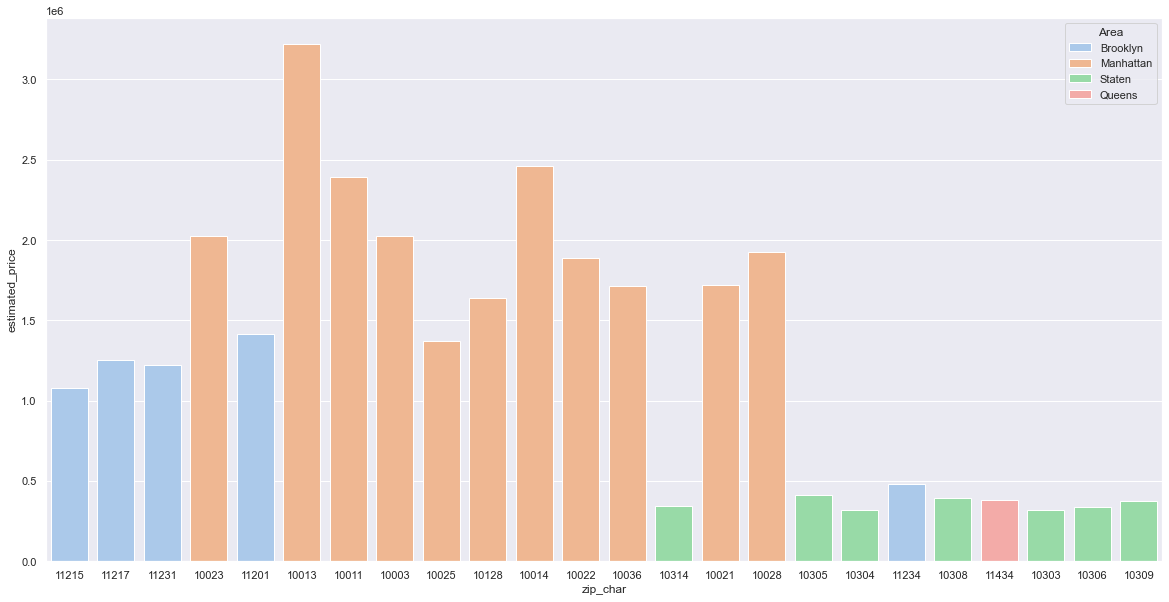

In [26]:
sns.barplot(x = 'zip_char', y = 'estimated_price', hue = "Area", data = data_filtered, palette = 'pastel', dodge=False)

<AxesSubplot:xlabel='zip_char', ylabel='price'>

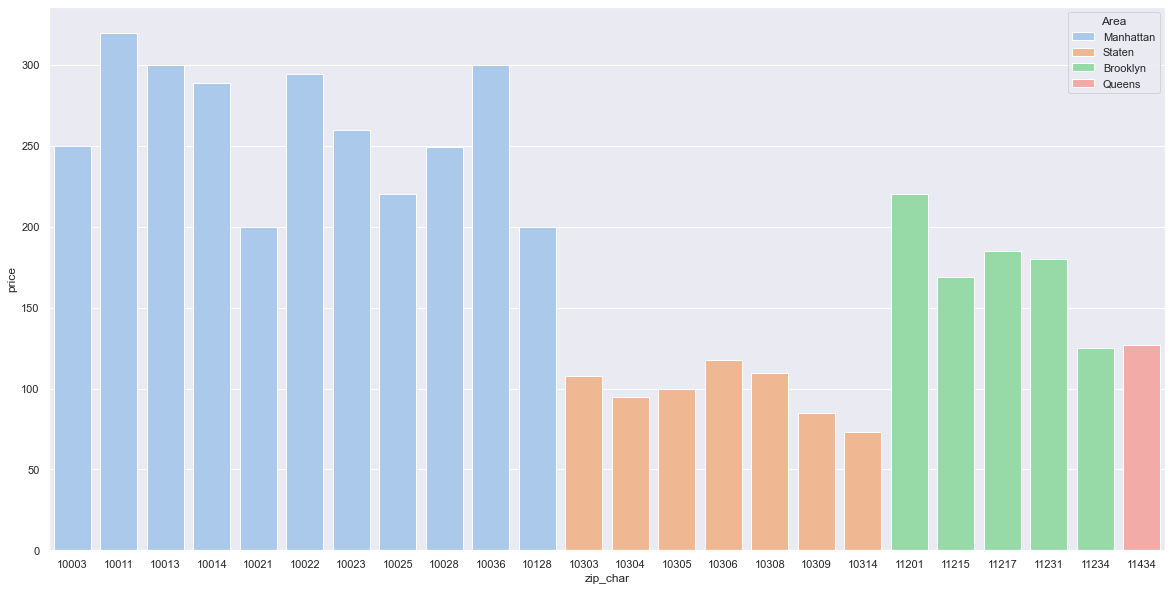

In [27]:
#Median price of each zipcode
data_filtered_smry = data_filtered.groupby(['zip_char','Area']).agg({'price': 'median'}).reset_index()
# display(data_filtered_smry)
sns.barplot(x = 'zip_char', y = 'price', hue = "Area", data = data_filtered_smry, palette = 'pastel', dodge=False)

<AxesSubplot:xlabel='estimated_price', ylabel='price'>

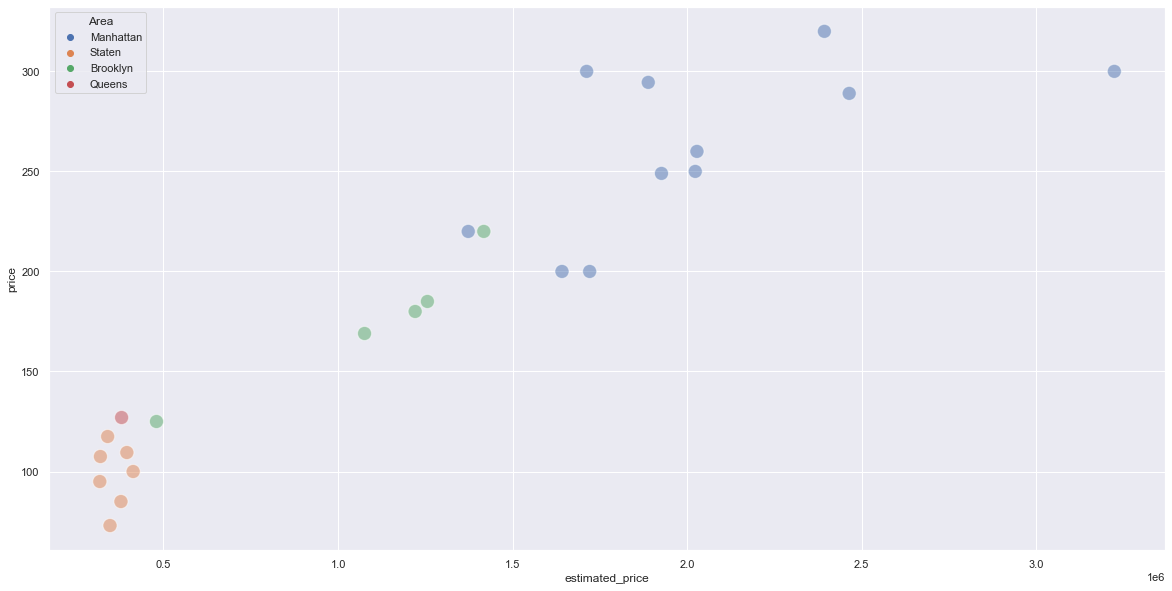

In [28]:
data_filtered_smry = data_filtered.groupby(['zip_char','Area']).agg({'price': 'median','estimated_price':'mean'}).reset_index()
# display(data_filtered_smry)
sns.scatterplot(x="estimated_price", 
                y="price",
                alpha=0.5,
                s=200,
                hue="Area",
                data=data_filtered_smry)

In [29]:
#estimated revenue
data_filtered_smry = data_filtered.groupby(['zip_char','zipcode','Area']).agg({'price': 'median', 'estimated_price':'mean', 'or_365': 'median'}).reset_index()

data_filtered_smry["annual_revenue"] = data_filtered_smry["price"]*(365*data_filtered["or_365"])
data_filtered_smry["roi_annual"] = (data_filtered_smry['annual_revenue']/data_filtered_smry['estimated_price'])

us_zip_center = pd.read_csv("us_zip_center.csv")
data_filtered_smry = pd.merge(data_filtered_smry, us_zip_center, on = "zipcode", how = "inner")
data_filtered_smry['Investment Score'] = data_filtered_smry["roi_annual"].rank()
display(data_filtered_smry.head())

#Convert the zipcode to string to match the geo json file
data_filtered_smry['zipcode'] = data_filtered_smry['zipcode'].astype('str') 


,zip_char,zipcode,Area,price,estimated_price,or_365,annual_revenue,roi_annual,latitude,longitude,Investment Score
0,10003,10003,Manhattan,250.0,2023090.62,0.91,91250.00,0.045104,40.731829,-73.989181,14.0
1,10011,10011,Manhattan,320.0,2392801.06,0.92,47888.00,0.020013,40.742039,-74.000620,10.0
2,10013,10013,Manhattan,300.0,3223138.10,0.91,109500.00,0.033973,40.720103,-74.004903,12.0
3,10014,10014,Manhattan,289.0,2463882.08,0.96,26371.25,0.010703,40.734012,-74.006746,4.0
4,10021,10021,Manhattan,200.0,1720613.56,0.89,36500.00,0.021213,40.769258,-73.958751,11.0


In [30]:
import folium
import json
import requests
nyc_map = folium.Map(location=[40.72, -73.89], zoom_start=12, tiles = "CartoDB positron")
geo_json_data = r'nyc_zip_code_tabulation_areas_polygons.geojson'

# folium.GeoJson(geo_json_data, name="geojson").add_to(nyc_map)

folium.Choropleth(geo_data = geo_json_data,
                data = data_filtered_smry,
                columns = ['zipcode', 'Investment Score'], 
                key_on = 'feature.properties.postalCode',
                fill_color='Greens', fill_opacity=0.5, line_opacity=0.2,
                legend_name = 'Investment Score',
                nan_fill_color='#00000000').add_to(nyc_map)

#below code add icon

# for i, row in data_filtered_smry.iterrows():
#     lat = row['latitude']
#     lgt = row['longitude']
    
#     popup = "zipcode: {}<br> Investment Score: {}"
#     popup = popup.format(row["zipcode"], row["Investment Score"])
#     popup = folium.Popup(popup, max_width = 150,min_width = 150)
#     folium.Marker(icon = folium.Icon(icon = 'home'), location = (lat, lgt), radius = 1.5, popup = popup, color = 'Pink', fill = True).add_to(nyc_map)

In [31]:
nyc_map